In [1]:
from itertools import product

In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt

In [4]:
def combinations(n: int, k: int) -> int:
    return np.math.factorial(n)//(np.math.factorial(k)*np.math.factorial(n-k))

Задача 1 и 2

вариант 1

In [4]:
llst=[0,0,0,1]

In [16]:
ss=1
sum0=0
sum1=0
sum2=0
sum3=0
sum4=0
sum5=0
for i in range(0,len(llst)):
    for k in range(0,len(llst)):
        for m in range(0,len(llst)):
            for n in range(0,len(llst)):
                for r in range(0,len(llst)):
                    val_str=str(llst[i])+str(llst[k])+str(llst[m])+str(llst[n])+str(llst[r])
                    vald=int(val_str,2)
                    if (vald==0):sum0+=1
                    elif ((vald==1)|(vald==2)|(vald==4)|(vald==8)|(vald==16)): sum1+=1
                    elif ((vald==3)|(vald==5)|(vald==6)|(vald==9)|(vald==10)|(vald==12)| \
                          (vald==17)|(vald==18)|(vald==20)|(vald==24)): sum2+=1
                    elif ((vald==7)|(vald==11)|(vald==13)|(vald==14)|(vald==19)| \
                          (vald==21)|(vald==22)|(vald==25)|(vald==26)|(vald==28)): sum3+=1
                    elif ((vald==15)|(vald==23)|(vald==27)|(vald==29)|(vald==30)): sum4+=1                                                   
                    elif (vald==31):sum5+=1
                    ss+=1
print(sum0)
print(sum1)
print(sum2)
print(sum3)
print(sum4)
print(sum5)
print(str(ss-1)+' '+str(sum0+sum1+sum2+sum3+sum4+sum5))

243
405
270
90
15
1
1024 1024


In [18]:
values=[sum0/(ss-1),sum1/(ss-1),sum2/(ss-1),sum3/(ss-1),sum4/(ss-1),sum5/(ss-1)]
values

[0.2373046875,
 0.3955078125,
 0.263671875,
 0.087890625,
 0.0146484375,
 0.0009765625]

In [18]:
plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

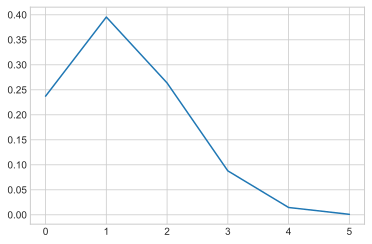

In [20]:
plt.plot(values)

посчитаем математическое ожидание:

In [22]:
x_val=np.array([0,1,2,3,4,5])
m = (x_val * values).sum()
print(m)

1.25


дисперсия:

In [24]:
y_values = x_val - m
print(y_values)
z_values = y_values ** 2
print(z_values)

[-1.25 -0.25  0.75  1.75  2.75  3.75]
[ 1.5625  0.0625  0.5625  3.0625  7.5625 14.0625]


In [25]:
d = (z_values * values).sum()
print(d)

0.9375


Вариант 2
пусть Х-дискретная случ.величина. Она распределена по биноминальному закону с параметрами n=5 (число вопросов), р=1/4 (вероятность угадать правильный ответ), поэтому вероятность вычисляются во формуле Бернулли:

In [7]:
n=5
p=1/4
k=0

In [9]:
P_x0=combinations(n,k)*(p**k)*((1-p)**(n-k))
P_x0

0.2373046875

In [10]:
k=1
P_x1=combinations(n,k)*(p**k)*((1-p)**(n-k))
P_x1

0.3955078125

In [11]:
k=2
P_x2=combinations(n,k)*(p**k)*((1-p)**(n-k))
P_x2

0.263671875

In [12]:
k=3
P_x3=combinations(n,k)*(p**k)*((1-p)**(n-k))
P_x3

0.087890625

In [13]:
k=4
P_x4=combinations(n,k)*(p**k)*((1-p)**(n-k))
P_x4

0.0146484375

In [14]:
k=5
P_x5=combinations(n,k)*(p**k)*((1-p)**(n-k))
P_x5

0.0009765625

математическое ожидание:

In [16]:
M_X=n*p
M_X

1.25

In [ ]:
дисперсия:

In [17]:
D_X=n*p*(1-p)
D_X

0.9375

Задача 3

Пользователь получает в среднем 10 писем со спамом на свой почтовый ящик за сутки. Найти число N, такое, что с вероятностью 0.95 пользователь получит не более N писем со спамом за текущий день.

In [78]:
def poisson_proba(k: int, lambda_: float) -> float:
    """Формула Пуассона.
    """
    return (lambda_ ** k) * (np.exp(-lambda_)) / np.math.factorial(k)

In [79]:
lambda_ = 10

In [81]:
sum(poisson_proba(k=i, lambda_=lambda_) for i in range(16))

0.9512595966960214

ответ: вероятность получения за день не более 15 писем равна 0,951

Задача 4

Производятся выстрелы по мишени. Вероятность попадания в мишень при одном выстреле равна 0.01. Сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание?

Подсказка: 1) "Вероятность попасть k раз при n выстрелах" - на какое распределение это похоже? 2) А если нам нужна вероятность P(X >= k), а не P(X = k)? 3) Здесь предстоит немножко покодить.

In [ ]:
p=0.01 # вероятность попадания в мишень при одном выстреле
#k=6  # количество попаданий

для нахождения вероятности попадания хотя бы 6 раз Р(х>=6)=1-P(x<6)=1-P(x=5). подбираем такое n, при котором вероятность попадания 5 раз равна 0.1

In [77]:
n=298
valk=[]
valp=[]
F_x=[0]
p_1=0
p_sum=0
for k in range(n+1):
    P=combinations(n,k)*(p**k)*(0.99**(n-k))
    valk.append(k)
    valp.append(round(P,6))
    p_sum+=P
    F_x.append(round(p_sum,6))
print(p_sum)
print(valk[:20])
print(valp[:20])
print(F_x[:20])
print(1-valp[5])

0.9999999999999973
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0.050037, 0.150615, 0.225923, 0.225162, 0.167735, 0.099624, 0.049141, 0.020706, 0.007608, 0.002476, 0.000723, 0.000191, 4.6e-05, 1e-05, 2e-06, 0.0, 0.0, 0.0, 0.0, 0.0]
[0, 0.050037, 0.200652, 0.426575, 0.651737, 0.819472, 0.919096, 0.968237, 0.988943, 0.996551, 0.999027, 0.99975, 0.999941, 0.999987, 0.999997, 1.0, 1.0, 1.0, 1.0, 1.0]
0.900376


In [ ]:
при n=298 вероятность попадания хотя бы 6 раз будет 0.9.

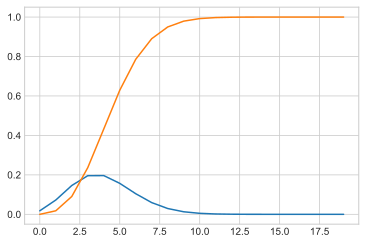

In [64]:
plt.plot(valk[:20],valp[:20])
plt.plot(valk[:20],F_x[:20])